In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from utils import PkdbModel, codeine_idx, measurement_type_data, filter_out, convert_unit, unstring
plt.style.use('seaborn-white')
import numpy as np
plt.rcParams.update({
        'axes.labelsize': '20',
        'axes.labelweight': 'bold',
        'axes.titlesize': 'medium',
        'axes.titleweight': 'bold',
        'legend.fontsize': '20',
        'xtick.labelsize': '20',
        'ytick.labelsize': '20',
        'figure.facecolor': '1.00'
    })

In [41]:
all_complete = PkdbModel("all_complete", destination="2-merged")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
all_complete.read()

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2909: DtypeWarning: Columns (28,29,30,31,44,72,90,114,115,117,119,121,123,124,126,127,128,129,132,133,134,136,140,144,153,155,156,157,166,174,176,177,178,179,181,182,184,186,188,194,195,196,203,204,208,211,212,220,225,229,230,235,239) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [43]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Loetsch2006")
substance_index = (all_complete.data["substance"] == "codeine")
substance_intervention_index = (all_complete.data["substance_intervention"] == "codeine")

In [44]:
#all_complete.data.columns.to_list()

In [45]:
all_complete.data["CYP"] = all_complete.data[('cyp2d6 phenotype', 'choice')]
all_complete.data["CYP_G"] = all_complete.data[('cyp2d6 genotype', 'choice')]


In [46]:
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]

In [47]:
my_data[["mean","value","median","time","value_intervention","unit","CYP","CYP_G","substance","substance_intervention"]]

,mean,value,median,time,value_intervention,unit,CYP,CYP_G,substance,substance_intervention
7349,NaN,"['3.32e-05', '1.46e-04', '6.34e-04', '5.54e-04...",NaN,"['0.00e+00', '3.00e-01', '7.00e-01', '1.30e+00...",0.03,mole / liter,em,*1/*1,codeine,codeine
7405,NaN,"['1.94e-05', '3.33e-04', '1.50e-03', '1.10e-03...",NaN,"['3.00e-01', '5.00e-01', '8.00e-01', '1.40e+00...",0.03,mole / liter,im,*x/*4,codeine,codeine
7468,NaN,"['5.70e-06', '5.13e-05', '7.19e-04', '8.16e-04...",NaN,"['0.00e+00', '2.00e-01', '5.00e-01', '1.00e+00...",0.03,mole / liter,pm,*4/*4,codeine,codeine
7544,NaN,"['1.01e-04', '7.18e-04', '1.40e-03', '9.91e-04...",NaN,"['5.00e-02', '1.00e-01', '2.50e-01', '6.40e-01...",0.03,mole / liter,um,*1x2/*1,codeine,codeine
7625,NaN,"['8.78e-05', '8.38e-04', '1.23e-03', '9.32e-04...",NaN,"['0.00e+00', '1.00e-01', '2.00e-01', '6.00e-01...",0.03,mole / liter,em,*1/*1,codeine,codeine
7687,NaN,"['8.47e-05', '8.79e-04', '9.91e-04', None, '9....",NaN,"['0.00e+00', '2.00e-01', '4.00e-01', '5.00e-01...",0.03,mole / liter,em,*1/*4,codeine,codeine
7760,NaN,"['0.00e+00', '2.76e-05', '4.28e-04', '6.21e-04...",NaN,"['4.00e-01', '5.00e-01', '8.00e-01', '1.20e+00...",0.03,mole / liter,em,*1/*41,codeine,codeine
7841,NaN,"['2.27e-05', '1.48e-04', '5.80e-04', '6.82e-04...",NaN,"['1.00e-01', '3.00e-01', '5.00e-01', '1.00e+00...",0.03,mole / liter,im,*4/*41,codeine,codeine
7925,NaN,"['6.81e-05', '1.48e-04', '8.13e-04', '1.21e-03...",NaN,"['0.00e+00', '2.00e-01', '4.00e-01', '9.00e-01...",0.03,mole / liter,em,*1/*4,codeine,codeine
8004,NaN,"['0.00e+00', '1.91e-04', '6.87e-04', '7.29e-04...",NaN,"['0.00e+00', '2.00e-01', '5.00e-01', '9.00e-01...",0.03,mole / liter,em,*1/*1,codeine,codeine


In [48]:
CYP_Categories = {"em":"r",
                 "im":"g",
                 "pm":"b",
                 "um":"black"}

In [49]:
#fig, ax = plt.subplots()
frames = []
for i, df in my_data[["time","value","CYP","CYP_G", "individual_pk"]].dropna().iterrows():
    
    time_array = pd.to_numeric(eval(df["time"]))
    value_array = pd.to_numeric(eval(df["value"]))
    time_array = pd.to_numeric(eval(df["time"]))
    new_df = pd.concat([df]*len(time_array), axis=1).T.reset_index()
    new_df["time"] = time_array
    new_df["value"] = value_array
    frames.append(new_df)
df_all = pd.concat(frames)
    
    
    
    #ax.plot(x,y, color = CYP_Categories[df["CYP"]])


In [50]:
df_all = df_all.dropna(subset=["value"])

In [51]:
pd.to_numeric(eval(df["time"]))

array([0. , 0.3, 0.7, 1.3, 1.8, 2.2, 2.7, 3.3, 4. , 4.5, 5. ])

In [52]:
time_array = pd.to_numeric(eval(df["time"]))
new_df = pd.concat([df]*len(time_array), axis=1).T.reset_index()
new_df["time"] = pd.to_numeric(eval(df["time"]))
new_df["value"] = pd.to_numeric(eval(df["value"]))

In [53]:
new_df

,index,time,value,CYP,CYP_G,individual_pk
0,8082,0.0,0.000044,im,*7/*41,6681
1,8082,0.3,0.000198,im,*7/*41,6681
2,8082,0.7,0.000693,im,*7/*41,6681
3,8082,1.3,0.000740,im,*7/*41,6681
4,8082,1.8,0.000599,im,*7/*41,6681
5,8082,2.2,0.000521,im,*7/*41,6681
6,8082,2.7,0.000397,im,*7/*41,6681
7,8082,3.3,0.000347,im,*7/*41,6681
8,8082,4.0,0.000309,im,*7/*41,6681
9,8082,4.5,0.000264,im,*7/*41,6681


In [54]:
df_all.head()

,index,time,value,CYP,CYP_G,individual_pk
0,7349,0.0,0.000033,em,*1/*1,6680
1,7349,0.3,0.000146,em,*1/*1,6680
2,7349,0.7,0.000634,em,*1/*1,6680
3,7349,1.3,0.000554,em,*1/*1,6680
4,7349,1.8,0.000518,em,*1/*1,6680


In [55]:
# Plot the responses for different events and regions


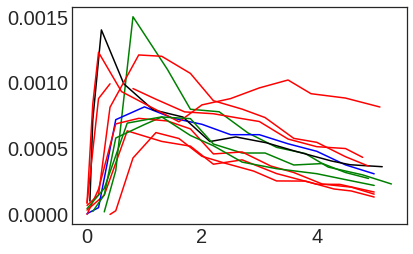

In [56]:
fig, ax = plt.subplots()
frames = []
for i, df in my_data[["time","value","CYP", "CYP_G","individual_pk"]].dropna().iterrows():
    
    time_array = pd.to_numeric(eval(df["time"]))
    value_array = pd.to_numeric(eval(df["value"]))
    time_array = pd.to_numeric(eval(df["time"]))
    new_df = pd.concat([df]*len(time_array), axis=1).T.reset_index()
    new_df["time"] = time_array
    new_df["value"] = value_array
    ax.plot(time_array,value_array, color = CYP_Categories[df["CYP"]])

    frames.append(new_df)
df_all = pd.concat(frames)
    
    
    

In [57]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Wu2014")
substance_index = (all_complete.data["substance"] == "morphine")
substance_intervention_index = (all_complete.data["substance_intervention"] == "codeine")
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]
my_data[["mean","time","sd","se","cv"]] =  my_data[["mean","time","sd","se","cv"]].applymap(eval).applymap(pd.to_numeric)

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [58]:
#timecourse_data = df_all.pivot_table(values = ["mean","sd"], columns="CYP_G", index="time")
from utils import convert_unit

In [59]:
from scipy.interpolate import interp1d

In [60]:
my_data

,study,output_type,pk,access,measurement_type,tissue,allowed_users,substance,interventions,raw_pk,...,"(lean body mass, count)","(lean body mass, mean)","(lean body mass, sd)","(lean body mass, unit)","(fat weight, count)","(fat weight, mean)","(fat weight, se)","(fat weight, unit)",CYP,CYP_G
9312,Wu2014,timecourses,12938,public,concentration,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,3932,12926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*1/*1
9373,Wu2014,timecourses,12942,public,concentration,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,3932,12930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*1/*10
9434,Wu2014,timecourses,12946,public,concentration,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,3932,12934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10


KeyError: 'mean'

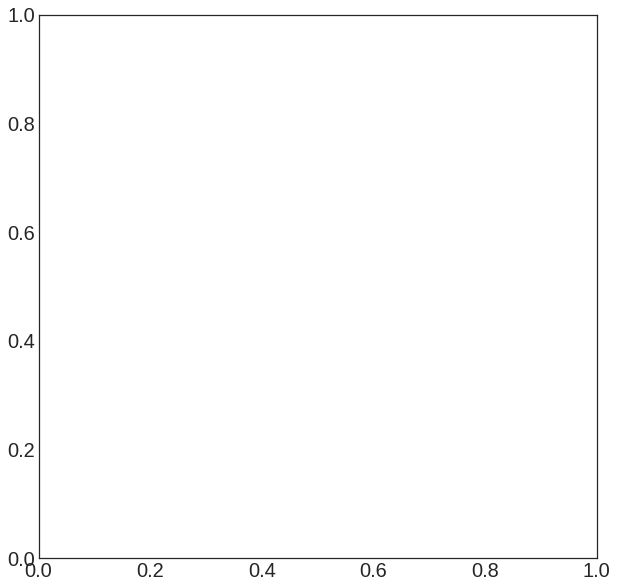

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

for CYP_G, df_CYP in df_all.groupby("CYP_G"):
    #plt.errorbar(x=df_CYP["time"], y=df_CYP["mean"], label=CYP_G ,yerr=df_CYP["se"])

    plt.plot(df_CYP["time"], df_CYP["mean"], label=CYP_G)#,yerr=df_CYP["sd"])
    
    plt.fill_between(df_CYP["time"],df_CYP["mean"]-df_CYP["se"],df_CYP["mean"]+df_CYP["se"],alpha=0.4,edgecolor="gray")
    #df = df_CYP.dropna(subset=["se"])
    
    #err_low_f = interp1d(df["time"],df["mean"]-df["se"], kind='linear')
    #err_high_f = interp1d(df["time"],df["mean"]+df["se"], kind='linear')
    
    #t_err =np.linspace(df["time"].min(),df["time"].max(), num= 30, endpoint=True)
    
    #plt.fill_between(t_err,err_low_f(t_err),err_high_f(t_err),alpha=0.4,edgecolor="gray")
plt.xlabel("time [hr]")
plt.ylabel(f"concentration [{df_CYP['unit'].unique()[0]}]")

plt.legend()
#sns.pointplot(data=df_all, x="time", y="mean",ci=1, hue="CYP_G", ax=ax, err_style="band")

In [61]:
df

time             ['0.00e+00', '3.00e-01', '7.00e-01', '1.30e+00...
value            ['4.42e-05', '1.98e-04', '6.93e-04', '7.40e-04...
CYP                                                             im
CYP_G                                                       *7/*41
individual_pk                                                 6681
Name: 8082, dtype: object

In [62]:
x = df_CYP["mean"]-df_CYP["se"]
x.dropna()

KeyError: 'mean'

In [63]:
df_all

,index,time,value,CYP,CYP_G,individual_pk
0,7349,0.0,0.000033,em,*1/*1,6680
1,7349,0.3,0.000146,em,*1/*1,6680
2,7349,0.7,0.000634,em,*1/*1,6680
3,7349,1.3,0.000554,em,*1/*1,6680
4,7349,1.8,0.000518,em,*1/*1,6680
5,7349,2.2,0.000381,em,*1/*1,6680
6,7349,2.7,0.000414,em,*1/*1,6680
7,7349,3.3,0.000310,em,*1/*1,6680
8,7349,4.0,0.000229,em,*1/*1,6680
9,7349,4.4,0.000228,em,*1/*1,6680


In [64]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Wu2014")
substance_index = (all_complete.data["substance_name"] == "morphine")
substance_intervention_index = (all_complete.data["substance_name_intervention"] == "codeine")
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]
my_data[["mean","time","sd","se","cv"]] =  my_data[["mean","time","sd","se","cv"]].applymap(eval).applymap(pd.to_numeric)

KeyError: 'substance_name'

In [ ]:
intervention_pk = my_data["interventions"].unique()[0]

In [ ]:
 my_data["pharmacokinetics"] = my_data["pharmacokinetics"].apply(eval).apply(lambda x: [e.get("pk") for e in x])

In [ ]:
frames = []
for i, df in my_data.iterrows():
    new_df = pd.concat([df]*len(df["pharmacokinetics"]), axis=1).T.reset_index()
    new_df["pharmacokinetics"] = df["pharmacokinetics"]
    frames.append(new_df)
#df_pk = pd.concat(frames)

In [ ]:
for i, df in my_data.iterrows():
     output_pks = all_complete.data[all_complete.data["timecourse_pk"] == df["pk"]]
        

In [ ]:
output_pks

In [ ]:
idx = (output_pks["unit"] == u"gram * hour / liter")

In [ ]:
output_pks

In [ ]:
output_pks["mean"]

In [ ]:
all_complete.data["timecourse_pk"]

In [ ]:
my_data

In [ ]:
frames = []
for i, df in my_data[["time","mean","sd","se","cv","CYP_G","unit"]].iterrows():
    
    
    new_df = pd.concat([df]*len(df["time"]), axis=1).T.reset_index()
    new_df["time"] = df["time"]
    new_df["mean"] = df["mean"]
    new_df["sd"] = df["sd"]
    new_df["se"] = df["se"]
    new_df["cv"] = df["cv"]
    frames.append(new_df)
df_all = pd.concat(frames)
df_all = convert_unit(df_all, "gram / liter", unit_out = "ng/ml", factor=1e+6, data_fields=["mean","sd","se"])

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
labels = []
for CYP_G, df_CYP in df_all.groupby("CYP_G"):
    plt.fill_between(df_CYP["time"],df_CYP["mean"]-df_CYP["se"],df_CYP["mean"]+df_CYP["se"],alpha=0.4,edgecolor="gray")
    
    
    output_pks[["mean","sd","se","median"]]=output_pks[["mean","sd","se","median"]].applymap(pd.to_numeric)
    convert_unit(df=output_pks,unit_in ="gram * hour / liter", unit_out="ng/ml/hr",factor=1e+6,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="gram / liter",  unit_out="ng/ml", factor=1e+6,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="hour",  unit_out="hr", factor=1,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="liter / hour",  unit_out="l/hr", factor=1,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="liter",  unit_out="l", factor=1,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="1 / minute",  unit_out="1/min", factor=1,data_fields=["mean","sd","se","median"])
    label = CYP_G
    G_c=        iter([label])

    for i, output in output_pks.iterrows():
        #label += (f"{output['pk']:>10}: {output['mean']:<4} [{output['unit']}:<4]")
        try:
            l = next(G_c)
        except:
            l = None
    
        plt.plot(df_CYP["time"], df_CYP["mean"],label=l)#,yerr=df_CYP["sd"])

    
    
    
plt.xlabel("time [hr]")
plt.ylabel(f"concentration [{df_CYP['unit'].unique()[0]}]")

plt.legend()
